# INTRADAY OPTION VALUES AND GREEKS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from financepy.finutils import *
from financepy.products.equity import FinEquityVanillaOption
from financepy.market.curves import FinDiscountCurveFlat
from financepy.models.FinModelBlackScholes import *

In [22]:
setDateFormatType(FinDateFormatTypes.DATETIME)

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

Option expires at 11am

In [47]:
expiryDate = FinDate(5, 1, 2021, 11, 0, 0)

In [48]:
strikePrice = 100.0

We now create the option object

In [49]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

## Valuation Dates

In [ ]:
startDate = FinDate(1, 1, 2021)

In [55]:
hoursToExpiry = int((expiryDate - startDate) * 24)

In [61]:
hoursToExpiry

107

In [56]:
valuationDates = []
times = []

nextValuationDate = startDate

for i in range(0, hoursToExpiry):
    nextValuationDate = nextValuationDate.addHours(1)
    valuationDates.append(nextValuationDate)
    time = (nextValuationDate - startDate) * 24
    times.append(time)

## Valuations

To do a valuation we need to specify the date and set the market inputs

In [58]:
stockPrice = 98.0
dividendYield = 0.02
interestRate = 0.05

In [59]:
volatility = 0.20
model = FinModelBlackScholes(volatility)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

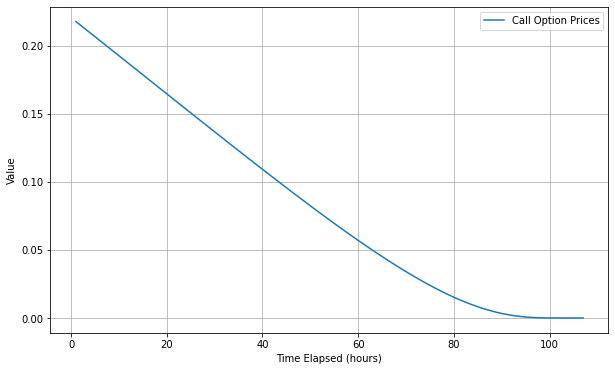

In [63]:
values = []
intTimes = []

for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    callValue = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(callValue)
    t = callOption._texp
    intTimes.append(t)

plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Prices")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

# Risk Sensitivities

## Delta

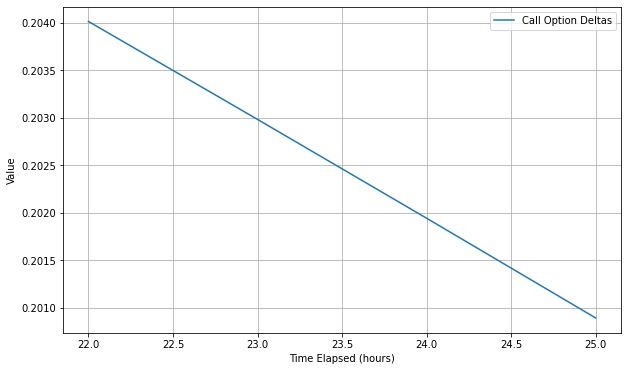

In [30]:
values = []
rates = []
tprev = 0.0

for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    delta = callOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(delta)
    t = callOption._texp
    tprev = t
    rate = discountCurve.zeroRate(expiryDate)
    rates.append(rate)
    
plt.figure(figsize=(10,6))
plt.plot(times[21:25], values[21:25], label="Call Option Deltas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Gamma

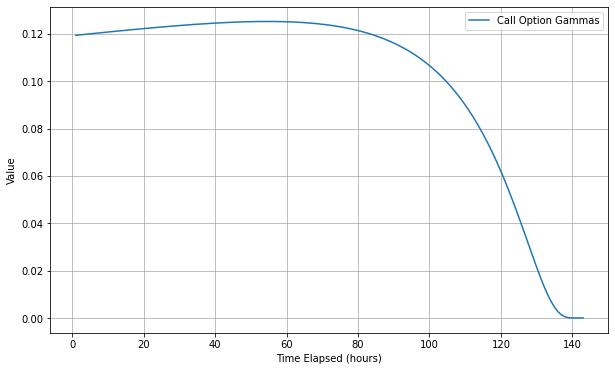

In [31]:
values = []
for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    callValue = callOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(callValue)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Gammas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Vega

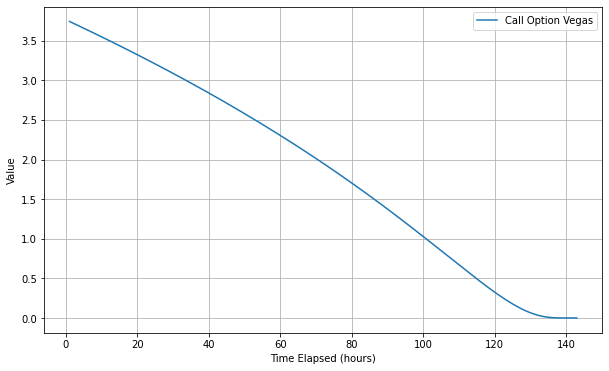

In [32]:
values = []
for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    callValue = callOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(callValue)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Vegas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Theta

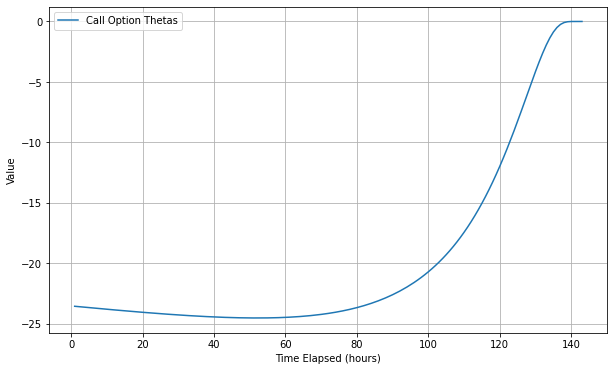

In [33]:
values = []
for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    callValue = callOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(callValue)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Thetas")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Rho

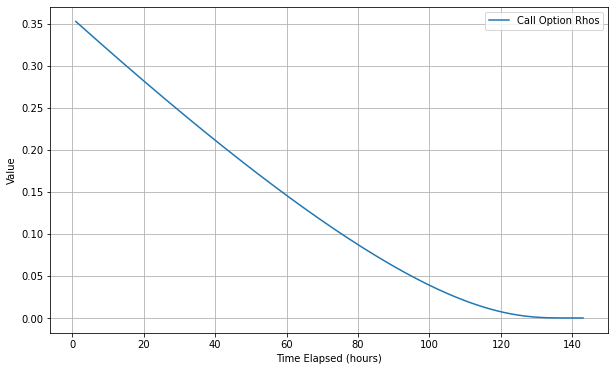

In [34]:
values = []
for valueDate in valuationDates:
    discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.ANNUAL)
    callValue = callOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(callValue)
    
plt.figure(figsize=(10,6))
plt.plot(times, values, label="Call Option Rhos")
plt.xlabel("Time Elapsed (hours)")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 